# Project Ohm

In [57]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.stats.sandwich_covariance as sw
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(style="darkgrid")

In [58]:
d = pd.read_csv("../data/meditation.csv")
d.head()

,ID,Group,Recruited_By,Location,Age_Group,Gender,Religion,Pre_existing_blood_pressure,Years_practice,caffeinated_drinks,...,After_Med_BP_DIA,After_Med_BP_PUL,Post_Med_focus,B4_color_BP_Sys,B4_color_BP_DIA,B4_color_BP_Pul,After_color_BP_Sys,After_color_BP_DIA,After_color_BP_Pul,Enjoy_Coloring
0,1,0,Erika,"San Diego, CA",40-49,F,Buddhist,Low,25,0.5,...,59,59,4.0,108,64,54,94,64,59,2.0
1,2,1,Erika,"Bellingham, WA",40-49,F,Buddhist,Avg,10,2.0,...,61,75,3.0,122,64,79,101,57,75,3.5
2,3,0,Erika,"Lopez Island, WA",50-59,M,Buddhist,Avg,45,2.0,...,73,85,4.0,123,64,79,109,69,83,4.0
3,4,1,Erika,"San Diego, CA",50-59,F,Spiritual,Low,47,1.0,...,71,95,3.0,121,91,100,113,75,93,5.0
4,5,0,Erika,"Redwood City, CA",50-59,F,Buddhist,Avg,24,3.0,...,81,79,4.0,124,79,77,116,65,82,4.0


In [59]:
d.columns

Index(['ID', 'Group', 'Recruited_By', 'Location', 'Age_Group', 'Gender',
       'Religion', 'Pre_existing_blood_pressure', 'Years_practice',
       'caffeinated_drinks', 'hours_since_last_caffeinated_drink',
       'Online_in_person', 'Experiment_Date', 'Start_Time',
       'previous_strenuous_activity', 'Before_Meditation_how_relaxed',
       'B4_Med_BP_Sys', 'B4_Med_BP_DIA', 'B4_Med_BP_PUL', 'After_Med_BP_Sys',
       'After_Med_BP_DIA', 'After_Med_BP_PUL', 'Post_Med_focus',
       'B4_color_BP_Sys', 'B4_color_BP_DIA', 'B4_color_BP_Pul',
       'After_color_BP_Sys', 'After_color_BP_DIA', 'After_color_BP_Pul',
       'Enjoy_Coloring'],
      dtype='object')

In [60]:
# Index 12 corresponds to ID 13, which appears to have been bad data
d=d.drop(d.index[12])

In [61]:
# Creating Pandas Series for Outcomes of Interest
d['HeartRate_C'] = d['B4_color_BP_Pul']-d['After_color_BP_Pul']
d['HeartRate_M'] = d['B4_Med_BP_PUL']-d['After_Med_BP_PUL']

d['Sys_C'] = d['B4_color_BP_Sys']-d['After_color_BP_Sys']
d['Sys_M'] = d['B4_Med_BP_Sys']-d['After_Med_BP_Sys']

d['DIA_C'] = d['B4_color_BP_DIA']-d['After_color_BP_DIA']
d['DIA_M'] = d['B4_Med_BP_DIA']-d['After_Med_BP_DIA']

In [62]:
d['HeartRate_C'].mean()

1.3548387096774193

In [63]:
d['order_grp'] = d["Group"].astype('category') 
d['recruiter'] = d["Recruited_By"].astype('category')
d['age'] = d['Age_Group'].astype('category')
d['gen'] = d["Gender"].astype('category')
d['rel'] = d["Religion"].astype('category')
d['bp_cat'] = d["Pre_existing_blood_pressure"].astype('category')
d['yrs'] = d["Years_practice"].astype('category')
d['caf'] = d["caffeinated_drinks"].astype('category')
d["hrs_caf"] = d["hours_since_last_caffeinated_drink"].astype('category')
d["in_pers"] = d["Online_in_person"].astype('category')
d['activity'] = d["previous_strenuous_activity"].astype('category')
d['prior_state'] = d["Before_Meditation_how_relaxed"].astype('category')
d["med_foc"] = d['Post_Med_focus'].astype('category')
d['col_enj'] = d["Enjoy_Coloring"].astype('category')

In [64]:
d = d.dropna()
# Need to round the 2.5 number--because it is causing error...
d['med_foc']=d['med_foc'].round()

In [65]:
# Looking at Heart Rate Change after Meditation
# Including caf NOT hrs_caf
Mrob_ols = sm.ols(formula='HeartRate_M ~ order_grp+ recruiter + age + gen + rel + bp_cat + caf + yrs + in_pers + activity + prior_state + med_foc', data=d).fit(cov_type='HC1', use_t=True)
# + med_foc

Mrob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_M   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                -5.294e+16
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               1.00
Time:                        02:52:08   Log-Likelihood:                -15.707
No. Observations:                  31   AIC:                             89.41
Df Residuals:                       2   BIC:                             131.0
Df Model:                          28                                         
Covariance Type:                  HC1                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  8.8976      1.000      8.895      0.012         4.594    13.201
order_grp[T.1]            -6.8278      0.609    -11.204      0.008        -9.450    -4.206
recruiter[T.Post]         -9.5865      2.723     -3.521      0.072       -21.302     2.129
recruiter[T.Thong]         4.9684      1.352      3.674      0.067        -0.851    10.787
age[T.30-39]               2.0246      1.937      1.045      0.406        -6.310    10.359
age[T.40-49]              -0.5160      0.657     -0.786      0.514        -3.341     2.309
age[T.5-9]                -1.4676      0.837     -1.753      0.222        -5.070     2.135
age[T.50-59]               3.9524      1.562      2.530      0.127        -2.770    10.675
age[T.60-69]              -0.2885      0.597     -0.483      0.677        -2.858     2.281
age[T.80-90]               7.7953      1.107      7.045      0.020         3.034    12.556
gen[T.M]                   3.9676      3.348      1.185      0.358       -10.438    18.373
rel[T.Buddhist]           -5.4014      0.840     -6.433      0.023        -9.014    -1.789
rel[T.Christian]           0.7450      1.133      0.657      0.579        -4.132     5.622
rel[T.Hindu]              -5.2284      2.161     -2.420      0.137       -14.526     4.069
rel[T.None]               -5.7940      1.493     -3.880      0.060       -12.219     0.631
rel[T.Spiritual]          -0.2399      0.579     -0.414      0.719        -2.732     2.253
bp_cat[T.High]             3.4698      1.192      2.910      0.101        -1.660     8.600
bp_cat[T.Low]              6.2861      0.315     19.961      0.003         4.931     7.641
caf[T.0.5]                 6.5260      0.751      8.691      0.013         3.295     9.757
caf[T.1.0]                -0.5000      1.392     -0.359      0.754        -6.489     5.489
caf[T.2.0]                -5.9352      2.773     -2.140      0.166       -17.867     5.997
caf[T.3.0]                 3.8032      2.133      1.783      0.217        -5.376    12.983
caf[T.6.0]                 4.2363      1.219      3.476      0.074        -1.007     9.480
yrs[T.1]                   4.8204      2.597      1.856      0.205        -6.355    15.996
yrs[T.2]                  -2.6377      1.044     -2.525      0.127        -7.132     1.856
yrs[T.10]                 10.9952      2.806      3.919      0.059        -1.077    23.067
yrs[T.11]                  9.5945      1.358      7.067      0.019         3.753    15.436
yrs[T.17]                 -7.0986      0.967     -7.338      0.018       -11.261    -2.936
yrs[T.24]                -11.0235      1.534     -7.186      0.019       -17.624    -4.424
yrs[T.25]                -10.5475      1.278     -8.251      0.014       -16.048    -5.047
yrs[T.45]                  1.3712      1.376      0.996      0.424        -4.550

In [66]:
# Looking at Heart Rate Change after Meditation
# Including hrs_caf NOT caf
Mrob_ols = sm.ols(formula='HeartRate_M ~ order_grp+ recruiter + age + gen + rel + bp_cat + hrs_caf + yrs + in_pers + activity + prior_state + med_foc', data=d).fit(cov_type='HC1', use_t=True)
# + med_foc

Mrob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_M   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                -4.147e+17
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               1.00
Time:                        02:52:09   Log-Likelihood:                -15.707
No. Observations:                  31   AIC:                             89.41
Df Residuals:                       2   BIC:                             131.0
Df Model:                          28                                         
Covariance Type:                  HC1                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  4.6815      0.402     11.633      0.007         2.950     6.413
order_grp[T.1]            -5.8048      0.956     -6.069      0.026        -9.920    -1.690
recruiter[T.Post]         -2.8298      1.823     -1.552      0.261       -10.673     5.014
recruiter[T.Thong]         8.1706      1.242      6.577      0.022         2.825    13.516
age[T.30-39]               2.5101      1.577      1.592      0.252        -4.273     9.293
age[T.40-49]              -0.2957      1.065     -0.278      0.807        -4.879     4.288
age[T.5-9]                -0.9073      0.820     -1.106      0.384        -4.435     2.621
age[T.50-59]               3.1723      0.935      3.391      0.077        -0.853     7.197
age[T.60-69]              -0.1854      0.706     -0.263      0.817        -3.223     2.852
age[T.80-90]               1.1514      1.085      1.061      0.400        -3.516     5.819
gen[T.M]                   3.4073      3.356      1.015      0.417       -11.034    17.849
rel[T.Buddhist]           -0.3633      0.381     -0.955      0.441        -2.001     1.274
rel[T.Christian]           2.3512      1.171      2.007      0.183        -2.688     7.391
rel[T.Hindu]              -2.9712      0.721     -4.121      0.054        -6.073     0.131
rel[T.None]               -0.8535      1.039     -0.822      0.498        -5.324     3.617
rel[T.Spiritual]           2.2765      0.261      8.712      0.013         1.152     3.401
bp_cat[T.High]             2.7008      0.049     54.629      0.000         2.488     2.914
bp_cat[T.Low]              7.2313      0.378     19.134      0.003         5.605     8.857
hrs_caf[T.1.0]             1.4157      1.201      1.179      0.360        -3.751     6.582
hrs_caf[T.2.0]            -2.7869      1.144     -2.435      0.135        -7.711     2.137
hrs_caf[T.3.0]             0.0078      0.838      0.009      0.993        -3.597     3.612
hrs_caf[T.4.0]             2.5705      0.426      6.034      0.026         0.737     4.404
hrs_caf[T.4.5]            -6.7220      2.499     -2.690      0.115       -17.473     4.029
hrs_caf[T.5.0]            -2.5142      0.270     -9.322      0.011        -3.675    -1.354
hrs_caf[T.6.0]             4.7795      0.325     14.697      0.005         3.380     6.179
hrs_caf[T.8.0]            -0.1854      0.706     -0.263      0.817        -3.223     2.852
hrs_caf[T.9.0]             1.8004      2.378      0.757      0.528        -8.433    12.034
hrs_caf[T.10.0]            3.1722      0.811      3.914      0.060        -0.315     6.660
hrs_caf[T.11.0]            1.1888      1.399      0.850      0.485        -4.831     7.208
hrs_caf[T.24.0]           -2.2869      1.177     -1.943      0.192        -7.352     2.778
yrs[T.1]                   3.5404      0.770      4.595      0.044         0.225

In [67]:
# Looking at Heart Rate Change after Coloring
# Including caf NOT hrs_caf
rob_ols = sm.ols(formula='HeartRate_C ~ order_grp + recruiter + age + gen + rel + bp_cat + caf + yrs + in_pers + activity + prior_state + col_enj', data=d).fit(cov_type='HC1', use_t=True)
rob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_C   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 2.424e+20
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           5.09e-11
Time:                        02:52:09   Log-Likelihood:                -1.5041
No. Observations:                  31   AIC:                             63.01
Df Residuals:                       1   BIC:                             106.0
Df Model:                          29                                         
Covariance Type:                  HC1                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  2.2799      1.652      1.380      0.399       -18.707    23.267
order_grp[T.1]             0.7601      0.567      1.341      0.408        -6.439     7.959
recruiter[T.Post]          5.1010      0.303     16.851      0.038         1.255     8.947
recruiter[T.Thong]        -4.7015      1.034     -4.547      0.138       -17.839     8.436
age[T.30-39]             -10.4159      0.018   -585.639      0.001       -10.642   -10.190
age[T.40-49]               0.8658      1.841      0.470      0.720       -22.526    24.257
age[T.5-9]                 0.1383      0.784      0.176      0.889        -9.829    10.106
age[T.50-59]              -8.9453      3.936     -2.273      0.264       -58.955    41.065
age[T.60-69]              -5.1011      1.015     -5.027      0.125       -17.995     7.793
age[T.80-90]             -17.9414      2.276     -7.884      0.080       -46.855    10.973
gen[T.M]                  -4.1383      0.784     -5.275      0.119       -14.106     5.829
rel[T.Buddhist]           -3.1042      1.151     -2.697      0.226       -17.729    11.520
rel[T.Christian]           0.6904      1.510      0.457      0.727       -18.499    19.880
rel[T.Hindu]             -21.9360      4.749     -4.619      0.136       -82.284    38.412
rel[T.None]                5.6271      2.931      1.920      0.306       -31.615    42.869
rel[T.Spiritual]           1.5127      1.226      1.234      0.434       -14.069    17.094
bp_cat[T.High]           -10.0537      2.206     -4.557      0.138       -38.087    17.980
bp_cat[T.Low]             -8.5528      0.346    -24.741      0.026       -12.945    -4.160
caf[T.0.5]               -10.0654      1.572     -6.403      0.099       -30.039     9.909
caf[T.1.0]                18.0000      3.937      4.572      0.137       -32.024    68.024
caf[T.2.0]                15.1383      3.153      4.802      0.131       -24.918    55.195
caf[T.3.0]                -3.3442      3.353     -0.997      0.501       -45.943    39.255
caf[T.6.0]                 6.6716      1.719      3.881      0.161       -15.173    28.516
yrs[T.1]                  -6.0415      0.562    -10.752      0.059       -13.181     1.098
yrs[T.2]                  27.1433      2.608     10.409      0.061        -5.990    60.277
yrs[T.10]                 -4.5898      1.507     -3.046      0.202       -23.735    14.555
yrs[T.11]                 13.8707      3.104      4.468      0.140       -25.573    53.314
yrs[T.17]                  4.1042      2.786      1.473      0.380       -31.296    39.504
yrs[T.24]                 12.8069      0.961     13.323      0.048         0.593    25.021
yrs[T.25]                  7.2359      1.710      4.231      0.148       -14.493    28.965
yrs[T.45]                 -8.8398      3.688     -2.397      0.252       -55.695

# Adjusting To "Cleaner" Categories

### First Clean Up Years Practiced

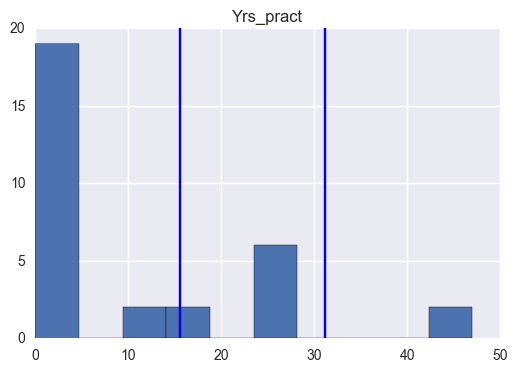

In [68]:
plt.hist(d["Years_practice"], bins=10)
plt.title("Yrs_pract")
plt.axvline(x=15.6)
plt.axvline(x=31.2)
plt.show()

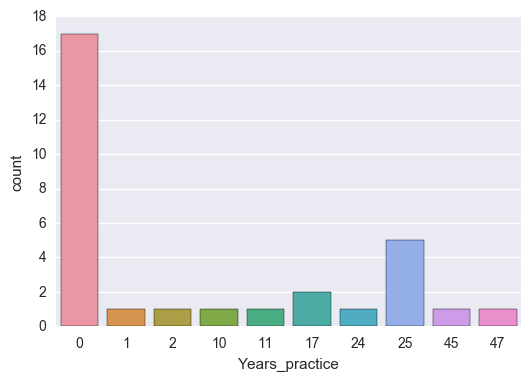

In [69]:
sns.countplot(x="Years_practice", data=d)

In [70]:
# Using function for mapping years
# Played around with different breakdowns, but think this is the most straightforward
# Corresponds to meditation experience or no meditation experience...
def yrMap(x):
    if x<0:
        return "Error"
    if x==0:
        return 0
    else:
        return 1

In [71]:
d['new_yr'] = d["Years_practice"].map(yrMap)

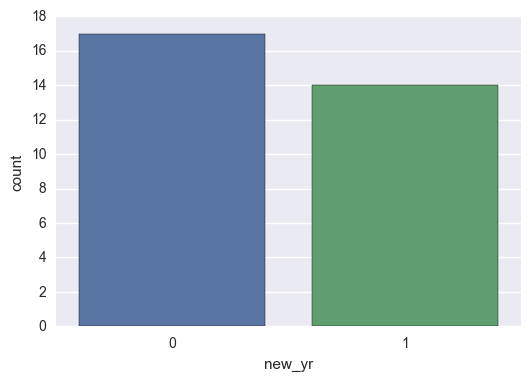

In [72]:
sns.countplot(x="new_yr", data=d)

### Now Clean Up Ages

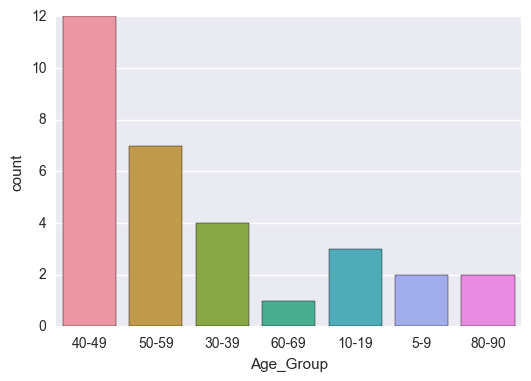

In [73]:
sns.countplot(x="Age_Group", data=d)

In [74]:
# First just clean up what appears to be an error in the data
def ageMap(x):
    if x== '30-40':
        return '30-39'
    if x=='40-50':
        return '40-49'
    if x== '50-60':
        return '50-59'
    else:
        return x

In [75]:
d['new_age'] = d["Age_Group"].map(ageMap)

In [76]:
d['age2'] = d['new_age'].astype('category')

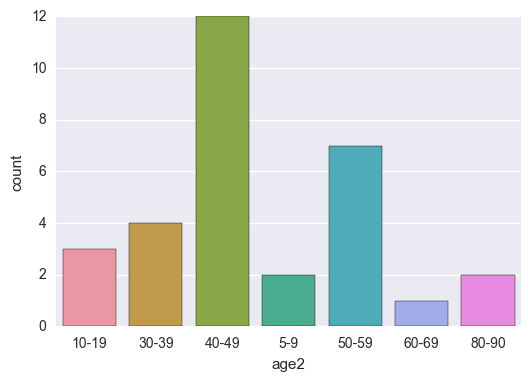

In [77]:
sns.countplot(x="age2", data=d)

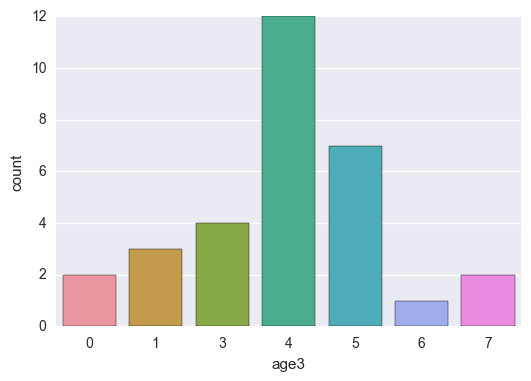

In [78]:
# Mapping years to integers
# Utilize a second map to create a third 'age' series as a set of integers
def ageMap2(x):
    if x=='5-9':
        return 0
    if x=='10-19':
        return 1
    if x=='20-29':
        return 2
    if x=='30-39':
        return 3
    if x=='40-49':
        return 4
    if x=='50-59':
        return 5
    if x=='60-69':
        return 6
    if x=='80-90':
        return 7
d['age3'] = d["age2"].map(ageMap2).astype(int)
sns.countplot(x="age3", data=d)

### Now Clean Up Religion...a monumental effort

In [79]:
# First Catholic to Christian
def relMap(x):
    if x=='Cathollic' or x=='Catholic' or x=='Christian':
        return 'C'
    if x=='Buddhist':
        return 'B'
    if x== 'None':
        return 'None'
    else:
        return 'Other'

In [80]:
d['new_rel'] = d["Religion"].map(relMap)

In [81]:
d['rel2'] = d['new_rel'].astype('category')

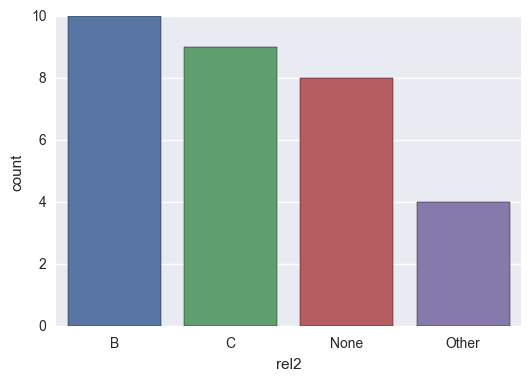

In [82]:
# Plot religious distribution to see break-out:
sns.countplot(x="rel2", data=d)


### Now Clean Up Caffeine

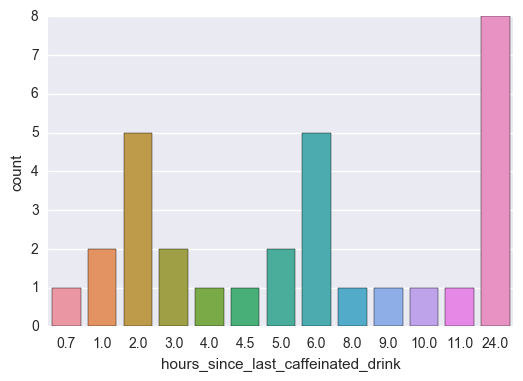

In [83]:
sns.countplot(x='hours_since_last_caffeinated_drink', data=d)

In [84]:
# Ensure higher numbers relate to having caffeine closer to the time of taking the test...
def hcafMap(x):
    if x==24:
        return 0
    else:
        return 11-x

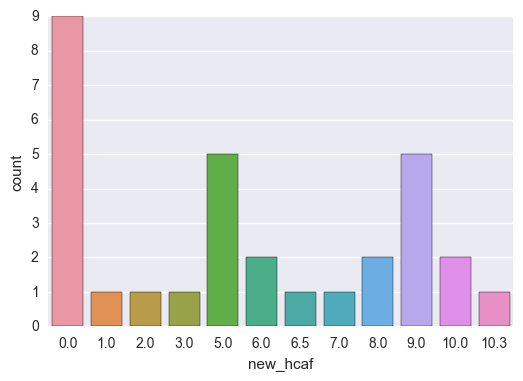

In [85]:
d['new_hcaf'] = d["hours_since_last_caffeinated_drink"].map(hcafMap)
sns.countplot(x='new_hcaf', data=d)

# Clean Up In-Person

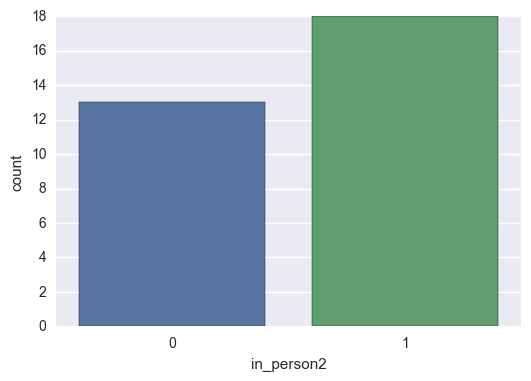

In [86]:
def OImap(x):
    if x=='O':
        return 0
    else:
        return 1

d['in_person2'] = d["Online_in_person"].map(OImap)
sns.countplot(x='in_person2', data=d)

# Clean Up Activity

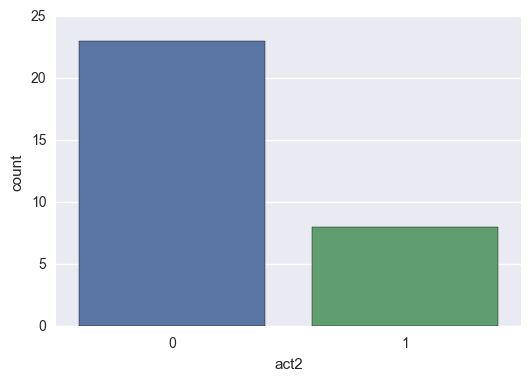

In [87]:
def actMap(x):
    if x == "Yes":
        return 1
    else:
        return 0
    
d['act2'] = d["previous_strenuous_activity"].map(actMap)
sns.countplot(x='act2', data=d)

# Clean Up Previous State:  Relaxed/Tense

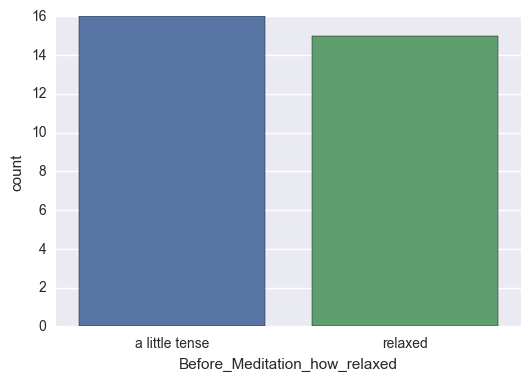

In [88]:
sns.countplot(x='Before_Meditation_how_relaxed', data=d)

In [89]:
# choosing tense as 1 because tension sets up more potential for relaxation...
# challenge: one measurement taken before tests...so the first experiment stage (coloring or meditation)
# may show the most lowering of blood pressure...when coloring comes first, we might expect to see it compete better with meditation
# that is when the subject is tense...then colors...(initial spike already lowered)...then meditation...(less lowering)

def tensorMap(x):
    if x == 'a little tense':
        return 1
    else:
        return 0
    
d['tense2'] = d['Before_Meditation_how_relaxed'].map(tensorMap)

# Running Analysis With Clean(er) Variables

In [90]:
Mrob_ols2 = sm.ols(formula='HeartRate_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Mrob_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_M   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     29.21
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           5.04e-08
Time:                        02:52:20   Log-Likelihood:                -75.122
No. Observations:                  31   AIC:                             184.2
Df Residuals:                      14   BIC:                             208.6
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              9.4076      7.946      1.184      0.256        -7.634    26.450
order_grp[T.1]        -4.0482      1.925     -2.103      0.054        -8.177     0.081
recruiter[T.Post]    -16.7494      5.930     -2.825      0.014       -29.467    -4.032
recruiter[T.Thong]     2.9727      2.142      1.388      0.187        -1.622     7.567
gen[T.M]               1.2012      2.024      0.593      0.562        -3.141     5.543
rel2[T.C]             11.0045      4.486      2.453      0.028         1.384    20.626
rel2[T.None]          -6.0817      4.742     -1.283      0.220       -16.252     4.089
rel2[T.Other]         -1.6044      2.996     -0.536      0.601        -8.029     4.821
bp_cat[T.High]        -9.3989      4.692     -2.003      0.065       -19.462     0.665
bp_cat[T.Low]          2.9171      3.482      0.838      0.416        -4.552    10.386
age3                  -1.0051      1.099     -0.915      0.376        -3.361     1.351
new_hcaf               0.9351      0.545      1.715      0.108        -0.234     2.104
new_yr                -8.6266      2.135     -4.041      0.001       -13.205    -4.048
in_person2            -3.6422      2.891     -1.260      0.228        -9.843     2.558
act2                  -8.8645      1.854     -4.781      0.000       -12.841    -4.888
tense2                 2.8318      2.040      1.388      0.187        -1.544     7.208
med_foc               -0.1173      1.620     -0.072      0.943        -3.591     3.356
==============================================================================
Omnibus:                        0.006   Durbin-Watson:                   3.234
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.150
Skew:                          -0.028   Prob(JB):                        0.928
Kurtosis:                       2.664   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

d['HeartRate_C'] = d['After_color_BP_Pul']-d['B4_color_BP_Pul']
d['HeartRate_M'] = d['After_Med_BP_PUL']-d['B4_Med_BP_PUL']

d['Sys_C'] = d['After_color_BP_Sys']-d['B4_color_BP_Sys']
d['Sys_M'] = d['After_Med_BP_Sys']-d['B4_Med_BP_Sys']

d['DIA_C'] = d['After_color_BP_DIA']-d['B4_color_BP_DIA']
d['DIA_M'] = d['After_Med_BP_DIA']-d['B4_Med_BP_DIA']

In [91]:
Msys = sm.ols(formula='Sys_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + new_person + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Msys.summary()

PatsyError: Error evaluating factor: NameError: name 'new_person' is not defined
    Sys_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + new_person + act2 + tense2 + med_foc
                                                                                     ^^^^^^^^^^

In [92]:
Mdia = sm.ols(formula='DIA_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Mdia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DIA_M   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     16.58
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           2.00e-06
Time:                        02:52:21   Log-Likelihood:                -84.760
No. Observations:                  31   AIC:                             203.5
Df Residuals:                      14   BIC:                             227.9
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -8.2737     11.205     -0.738      0.472       -32.307    15.759
order_grp[T.1]         4.2614      2.809      1.517      0.152        -1.764    10.287
recruiter[T.Post]     -4.1363      9.092     -0.455      0.656       -23.637    15.364
recruiter[T.Thong]     0.9573      4.110      0.233      0.819        -7.857     9.772
gen[T.M]               2.0914      3.834      0.545      0.594        -6.132    10.315
rel2[T.C]             18.1730      5.984      3.037      0.009         5.339    31.007
rel2[T.None]          -4.9077      4.980     -0.986      0.341       -15.588     5.773
rel2[T.Other]          9.3751      3.528      2.657      0.019         1.808    16.942
bp_cat[T.High]        -2.6929      5.584     -0.482      0.637       -14.669     9.283
bp_cat[T.Low]         11.9354      3.967      3.009      0.009         3.427    20.444
age3                  -0.4920      1.620     -0.304      0.766        -3.967     2.983
new_hcaf               0.6746      0.562      1.201      0.250        -0.531     1.880
new_yr                 9.1246      2.908      3.138      0.007         2.888    15.361
in_person2             2.1601      3.662      0.590      0.565        -5.694    10.014
act2                   2.5263      2.738      0.923      0.372        -3.347     8.399
tense2                -2.3131      2.440     -0.948      0.359        -7.546     2.920
med_foc               -0.8235      2.008     -0.410      0.688        -5.130     3.483
==============================================================================
Omnibus:                        2.270   Durbin-Watson:                   2.351
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.450
Skew:                           0.268   Prob(JB):                        0.484
Kurtosis:                       2.087   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# Color Enjoyment

In [93]:
d.columns

Index(['ID', 'Group', 'Recruited_By', 'Location', 'Age_Group', 'Gender',
       'Religion', 'Pre_existing_blood_pressure', 'Years_practice',
       'caffeinated_drinks', 'hours_since_last_caffeinated_drink',
       'Online_in_person', 'Experiment_Date', 'Start_Time',
       'previous_strenuous_activity', 'Before_Meditation_how_relaxed',
       'B4_Med_BP_Sys', 'B4_Med_BP_DIA', 'B4_Med_BP_PUL', 'After_Med_BP_Sys',
       'After_Med_BP_DIA', 'After_Med_BP_PUL', 'Post_Med_focus',
       'B4_color_BP_Sys', 'B4_color_BP_DIA', 'B4_color_BP_Pul',
       'After_color_BP_Sys', 'After_color_BP_DIA', 'After_color_BP_Pul',
       'Enjoy_Coloring', 'HeartRate_C', 'HeartRate_M', 'Sys_C', 'Sys_M',
       'DIA_C', 'DIA_M', 'order_grp', 'recruiter', 'age', 'gen', 'rel',
       'bp_cat', 'yrs', 'caf', 'hrs_caf', 'in_pers', 'activity', 'prior_state',
       'med_foc', 'col_enj', 'new_yr', 'new_age', 'age2', 'age3', 'new_rel',
       'rel2', 'new_hcaf', 'in_person2', 'act2', 'tense2'],
      dtype='object

In [94]:
d['Enjoy_Coloring']

0     2.0
1     3.5
2     4.0
3     5.0
4     4.0
5     2.0
6     4.0
7     4.0
8     4.0
9     4.0
10    5.0
11    3.0
13    4.0
14    4.0
15    3.5
16    4.0
17    3.0
18    4.0
19    4.0
20    5.0
21    4.0
22    2.0
23    2.0
24    4.0
25    4.0
26    4.0
27    3.0
28    4.0
29    3.0
30    4.0
31    3.0
Name: Enjoy_Coloring, dtype: float64

# Now Do "Difference in Differences"

In [95]:
d['HR_diff'] = d['HeartRate_M'] - d['HeartRate_C']
d['Sys_diff'] = d['Sys_M'] - d['Sys_C']
d['DIA_diff'] = d['DIA_M'] - d['DIA_C']

In [96]:
d['HR_diff'].mean()

-1.8709677419354838

In [97]:
HR_diff_ols = sm.ols(formula='HR_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

HR_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HR_diff   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     4.909
Date:                Sun, 13 Aug 2017   Prob (F-statistic):            0.00290
Time:                        02:52:23   Log-Likelihood:                -89.443
No. Observations:                  31   AIC:                             214.9
Df Residuals:                      13   BIC:                             240.7
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            -16.3724     14.149     -1.157      0.268       -46.940    14.195
order_grp[T.1]        -4.7287      4.246     -1.114      0.286       -13.902     4.444
recruiter[T.Post]      0.4489      9.328      0.048      0.962       -19.702    20.600
recruiter[T.Thong]     5.6822      5.193      1.094      0.294        -5.536    16.900
gen[T.M]               0.8033      5.413      0.148      0.884       -10.890    12.496
rel2[T.C]             -1.1649      7.010     -0.166      0.871       -16.308    13.979
rel2[T.None]          -5.9761      5.287     -1.130      0.279       -17.398     5.446
rel2[T.Other]         -2.2061      5.138     -0.429      0.675       -13.306     8.894
bp_cat[T.High]        -1.0891      6.788     -0.160      0.875       -15.753    13.574
bp_cat[T.Low]         11.8699      6.388      1.858      0.086        -1.930    25.670
age3                   1.4582      2.072      0.704      0.494        -3.018     5.935
new_hcaf               0.1117      0.603      0.185      0.856        -1.192     1.415
new_yr                -7.7885      4.293     -1.814      0.093       -17.063     1.486
in_person2             8.9228      4.206      2.121      0.054        -0.165    18.010
act2                  -8.1634      4.141     -1.971      0.070       -17.110     0.783
tense2                 3.9825      3.420      1.164      0.265        -3.407    11.372
med_foc                3.8071      2.494      1.526      0.151        -1.582     9.196
Enjoy_Coloring        -1.3610      2.232     -0.610      0.553        -6.183     3.461
==============================================================================
Omnibus:                        1.815   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.604
Skew:                           0.525   Prob(JB):                        0.448
Kurtosis:                       2.625   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [98]:
Sys_diff_ols = sm.ols(formula='Sys_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

Sys_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Sys_diff   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     3.105
Date:                Sun, 13 Aug 2017   Prob (F-statistic):             0.0219
Time:                        02:52:24   Log-Likelihood:                -104.55
No. Observations:                  31   AIC:                             245.1
Df Residuals:                      13   BIC:                             270.9
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            -17.0548     24.862     -0.686      0.505       -70.765    36.655
order_grp[T.1]        -7.0336      5.036     -1.397      0.186       -17.913     3.846
recruiter[T.Post]     12.4495     16.616      0.749      0.467       -23.447    48.346
recruiter[T.Thong]    -0.9929      6.581     -0.151      0.882       -15.210    13.224
gen[T.M]               0.8337      6.889      0.121      0.906       -14.049    15.716
rel2[T.C]            -11.8082     15.456     -0.764      0.459       -45.199    21.582
rel2[T.None]          14.8601      6.923      2.146      0.051        -0.096    29.816
rel2[T.Other]         10.1747      9.974      1.020      0.326       -11.372    31.721
bp_cat[T.High]        20.2233     12.256      1.650      0.123        -6.253    46.700
bp_cat[T.Low]         23.1776      8.286      2.797      0.015         5.277    41.078
age3                   2.6832      2.985      0.899      0.385        -3.766     9.132
new_hcaf               0.1499      0.891      0.168      0.869        -1.775     2.075
new_yr                -5.9420      7.747     -0.767      0.457       -22.678    10.794
in_person2             8.0373      6.400      1.256      0.231        -5.789    21.863
act2                  -0.4045      6.010     -0.067      0.947       -13.388    12.579
tense2                 6.4063      6.299      1.017      0.328        -7.202    20.015
med_foc               -4.3878      3.129     -1.402      0.184       -11.147     2.371
Enjoy_Coloring         2.1590      3.570      0.605      0.556        -5.554     9.872
==============================================================================
Omnibus:                        0.376   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.537
Skew:                           0.126   Prob(JB):                        0.765
Kurtosis:                       2.407   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [99]:
DIA_diff_ols = sm.ols(formula='DIA_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

DIA_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIA_diff   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     9.504
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           9.39e-05
Time:                        02:52:24   Log-Likelihood:                -96.292
No. Observations:                  31   AIC:                             228.6
Df Residuals:                      13   BIC:                             254.4
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            -22.6473     20.106     -1.126      0.280       -66.084    20.789
order_grp[T.1]        -4.3328      4.014     -1.080      0.300       -13.004     4.338
recruiter[T.Post]     -2.5799     12.170     -0.212      0.835       -28.872    23.712
recruiter[T.Thong]    -2.5406      4.757     -0.534      0.602       -12.818     7.737
gen[T.M]               9.1528      7.919      1.156      0.269        -7.954    26.260
rel2[T.C]             16.8656      8.165      2.065      0.059        -0.775    34.506
rel2[T.None]           9.7249      6.296      1.545      0.146        -3.876    23.326
rel2[T.Other]          8.9064      6.482      1.374      0.193        -5.097    22.909
bp_cat[T.High]         7.6339      5.489      1.391      0.188        -4.225    19.492
bp_cat[T.Low]         18.0099      7.402      2.433      0.030         2.019    34.000
age3                   1.7884      2.089      0.856      0.407        -2.724     6.301
new_hcaf              -0.4599      0.601     -0.765      0.458        -1.758     0.838
new_yr                11.7720      3.993      2.948      0.011         3.147    20.398
in_person2             8.7742      5.229      1.678      0.117        -2.522    20.070
act2                   7.3640      3.872      1.902      0.080        -1.000    15.728
tense2                 2.1445      4.696      0.457      0.655        -8.001    12.290
med_foc               -1.7414      2.545     -0.684      0.506        -7.240     3.757
Enjoy_Coloring        -0.6111      3.167     -0.193      0.850        -7.453     6.231
==============================================================================
Omnibus:                       10.247   Durbin-Watson:                   2.399
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.977
Skew:                           0.947   Prob(JB):                      0.00682
Kurtosis:                       5.034   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# After looking at this, I really think we would have done better with more binary questions or questions with at most 3 answers...

# Really, the only insights of this study are related to how we would restructure the study in order to implement an effective study of this type

# Though there are a couple of interesting data points, when looking at this many different data points, we may expect one or two to be significant even by chance.  The various insights again just add more speculation that we may want to test with a new hypothesis and experiment

In [100]:
d.DIA_diff.mean()

0.16129032258064516

In [101]:
d.Sys_diff.mean()

-2.064516129032258

In [102]:
d.HR_diff.mean()

-1.8709677419354838

In [103]:
columns = d.columns
for i in columns[1:]:
    print(i, d.groupby(i).DIA_diff.mean())

Group Group
0    1.058824
1   -0.928571
Name: DIA_diff, dtype: float64
Recruited_By Recruited_By
Erika    1.416667
Post     2.428571
Thong   -2.416667
Name: DIA_diff, dtype: float64
Location Location
Bellingham, WA          -9.000000
Farmerville, LA          2.428571
Huntington Beach, Ca    -6.000000
Irvine, CA              -4.000000
Lopez Island, WA         2.000000
MA                      12.000000
Oakland, CA             -2.000000
Palo Alto, CA            6.400000
Redwood City, CA       -14.000000
San Diego, CA           11.000000
San Francisco            8.000000
San Francisco, CA       -8.666667
San Jose, CA            -0.500000
Sausalito, CA          -12.000000
Name: DIA_diff, dtype: float64
Age_Group Age_Group
10-19     8.000000
30-39     2.000000
40-49    -2.583333
5-9       0.500000
50-59    -1.571429
60-69    12.000000
80-90     1.000000
Name: DIA_diff, dtype: float64
Gender Gender
F    0.250000
M    0.105263
Name: DIA_diff, dtype: float64
Religion Religion
Agnostic      2.00

In [ ]:
for i in columns[1:]:
    print(i, d.groupby(i).Sys_diff.mean())

Group Group
0   -1.647059
1   -2.571429
Name: Sys_diff, dtype: float64
Recruited_By Recruited_By
Erika   -1.500000
Post    -6.428571
Thong   -0.083333
Name: Sys_diff, dtype: float64
Location Location
Bellingham, WA         -24.000000
Farmerville, LA         -6.428571
Huntington Beach, Ca    -2.333333
Irvine, CA              -9.000000
Lopez Island, WA       -22.000000
MA                     -11.000000
Oakland, CA              6.000000
Palo Alto, CA            5.400000
Redwood City, CA       -10.000000
San Diego, CA           10.000000
San Francisco            0.000000
San Francisco, CA       -3.666667
San Jose, CA             8.000000
Sausalito, CA            0.000000
Name: Sys_diff, dtype: float64
Age_Group Age_Group
10-19     1.333333
30-39    -0.500000
40-49    -0.750000
5-9     -15.500000
50-59    -2.857143
60-69   -11.000000
80-90     2.500000
Name: Sys_diff, dtype: float64
Gender Gender
F   -2.500000
M   -1.789474
Name: Sys_diff, dtype: float64
Religion Religion
Agnostic     23.00

In [ ]:
for i in columns[1:]:
    print(i, d.groupby(i).HR_diff.mean())

Group Group
0    0.058824
1   -4.214286
Name: HR_diff, dtype: float64
Recruited_By Recruited_By
Erika   -4.750000
Post    -4.428571
Thong    2.500000
Name: HR_diff, dtype: float64
Location Location
Bellingham, WA          -5.000000
Farmerville, LA         -4.428571
Huntington Beach, Ca     2.666667
Irvine, CA             -25.000000
Lopez Island, WA        -3.000000
MA                       3.000000
Oakland, CA             -3.000000
Palo Alto, CA            0.200000
Redwood City, CA         1.000000
San Diego, CA           -2.000000
San Francisco            8.000000
San Francisco, CA        8.000000
San Jose, CA            -3.500000
Sausalito, CA          -22.000000
Name: HR_diff, dtype: float64
Age_Group Age_Group
10-19   -4.666667
30-39   -9.250000
40-49    0.416667
5-9     -9.000000
50-59    0.571429
60-69    3.000000
80-90   -0.500000
Name: HR_diff, dtype: float64
Gender Gender
F   -4.500000
M   -0.210526
Name: HR_diff, dtype: float64
Religion Religion
Agnostic    -2.000000
Buddhist